In [75]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=0)
xyz_grid = [[x, y, z] for z in range(10) for y in range(10) for x in range(10)]
xyz = rng.choice(xyz_grid, 64, replace=False) #随机在元胞内取64个点

定义PBC函数和L-J势

In [76]:
def pbc(r, ref, L): #注意这里的变量都是三维列表，表示坐标
    for i in range(3):
        while (r - ref)[i] > L/2:
            r[i] -= L
        while (ref - r)[i] > L/2:
            r[i] += L
    return r

def distance(r1, r2):
    d = 0
    d += sum((r1-r2)**2)
    return np.sqrt(d)

def LJ_Force(xyz_in): #第一个粒子受到的力
    F = [0, 0, 0]
    for i in range(3):
        for j in range(1, len(xyz)):
            r = distance(xyz_in[0], xyz_in[j])
            F[i] += 48 * (xyz_in[0,i] - xyz_in[j,i]) * (r**(-14) - 0.5 * r**(-8))                      
    return F



将采样点变换到最近粒子的位置

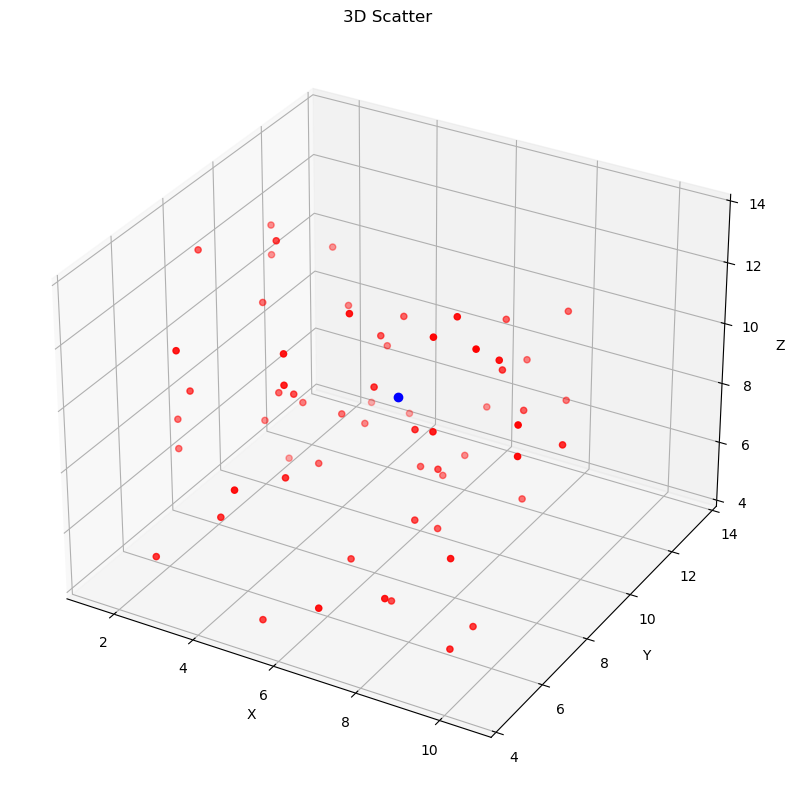

In [77]:
ref = xyz[0]
xyz_new = ref

for i in range(1,len(xyz)):
    xyz_new = np.vstack((xyz_new, pbc(xyz[i], ref, 10)))
  
#作图
fig = plt.figure(figsize=(10, 10), dpi=100)
ax = plt.axes(projection='3d')

#参考点设为图像正中心，为蓝色，其余点为红色
ax.scatter(xyz_new[1:,0], xyz_new[1:,1], xyz_new[1:,2], c='r', marker='o')
ax.plot3D(xyz_new[0,0], xyz_new[0,1], xyz_new[0,2], c='b', marker='o')

ax.set_xlabel('X')
ax.set_xlim3d(ref[0]-10/2, ref[0]+10/2)
ax.set_ylabel('Y')
ax.set_ylim3d(ref[1]-10/2, ref[1]+10/2)
ax.set_zlabel('Z')
ax.set_zlim3d(ref[2]-10/2, ref[2]+10/2)
ax.set_title("3D Scatter")

plt.show()


计算第一个粒子受到的合力

In [78]:
F = LJ_Force(xyz_new)
print(F)

[0.8281097592580223, -1.952711410731304, 1.3337094001380023]
